# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [61]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adadelta
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [62]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [66]:
def test_hypers(neurons, drops, batch_sizes, optims, optimNames):
    for n_neurons in neurons:
        for drop in drops:
            for batch_size in batch_sizes:
                for i_o, optim in enumerate(optims):
                    n_epoch = 20
                    model = Sequential()
                    model.add(Dense(n_neurons, input_shape=(784,), activation='relu'))
                    if drop > 0:
                        model.add(Dropout(drop))
                    model.add(Dense(n_classes, activation='softmax'))
                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                    history = model.fit(X_train, Y_train,
                                    batch_size=batch_size, epochs=n_epoch,
                                    verbose=1, validation_data=(X_test, Y_test))
                    pl.plot(history.history['loss'], label='Training')
                    pl.plot(history.history['val_loss'], label='Testing')
                    pl.ylabel('loss')
                    pl.xlabel('Number of epochs')
                    pl.title(optimNames[i_o]+' Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)))
                    pl.legend()
                    pl.grid()
                    pl.savefig('../output/' + optimNames[i_o]+'_Batch_size'+str(batch_size)+' Nb_epochs'+str(n_epoch)+' Nb_neurons'+str(n_neurons)+'_Dropout_'+ ('None' if drop < 0 else str(drop)) + '.png', dpi=500)
                    score = model.evaluate(X_test, Y_test, verbose=0)
                    print('Test score:', score[0])
                    print('Test accuracy:', score[1])

In [ ]:
test_hypers([5, 50, 100, 300], [-1, 0.3, 0.5], [64, 128, 256], [RMSprop(), Adam(), SGD()], ['RMSprop', 'Adam', 'SGD'])

Epoch 1/20
938/938 [==============================] - 4s 3ms/step - loss: 0.9885 - accuracy: 0.6961 - val_loss: 0.6416 - val_accuracy: 0.8089
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5710 - accuracy: 0.8343 - val_loss: 0.4934 - val_accuracy: 0.8632
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4848 - accuracy: 0.8642 - val_loss: 0.4529 - val_accuracy: 0.8752
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4525 - accuracy: 0.8733 - val_loss: 0.4326 - val_accuracy: 0.8797
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4337 - accuracy: 0.8787 - val_loss: 0.4279 - val_accuracy: 0.8833
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4203 - accuracy: 0.8822 - val_loss: 0.4188 - val_accuracy: 0.8842
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4094 - accuracy: 0.8859 - val_loss: 0.4067 - val_accuracy: 0.8893
Epoch 

In [55]:
n_neurons = 50
drop = 0.5
model = Sequential()
model.add(Dense(n_neurons, input_shape=(784,), activation='relu'))
if drop > 0:
    model.add(Dropout(drop))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 50)                39250     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [56]:
batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.7197 - accuracy: 0.7794 - val_loss: 0.2767 - val_accuracy: 0.9201
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4158 - accuracy: 0.8775 - val_loss: 0.2256 - val_accuracy: 0.9357
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3638 - accuracy: 0.8936 - val_loss: 0.1957 - val_accuracy: 0.9429
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3358 - accuracy: 0.9012 - val_loss: 0.1809 - val_accuracy: 0.9460
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3158 - accuracy: 0.9067 - val_loss: 0.1709 - val_accuracy: 0.9500
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3054 - accuracy: 0.9094 - val_loss: 0.1660 - val_accuracy: 0.9508
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2964 - accuracy: 0.9123 - val_loss: 0.1568 - val_accuracy: 0.9529
Epoch 

Show the performance of the model

Test score: 0.13354282081127167
Test accuracy: 0.9628000259399414


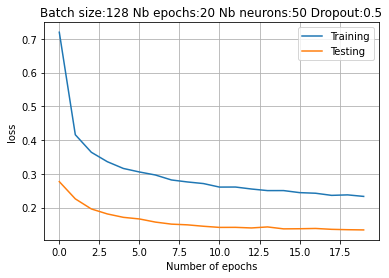

In [57]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.ylabel('loss')
pl.xlabel('Number of epochs')
pl.title('Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)) )
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [58]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 966,    0,    2,    1,    0,    3,    5,    1,    2,    0],
       [   0, 1113,    5,    2,    0,    0,    3,    1,   11,    0],
       [   2,    0,  999,    4,    5,    1,    2,    9,   10,    0],
       [   0,    0,   13,  971,    1,    7,    0,   10,    6,    2],
       [   1,    0,    5,    0,  950,    0,   10,    2,    3,   11],
       [   4,    1,    1,   11,    5,  846,    9,    4,    8,    3],
       [   9,    3,    2,    1,    4,    7,  927,    0,    5,    0],
       [   2,    8,   11,    8,    4,    0,    0,  990,    0,    5],
       [   6,    3,    5,    8,    7,    9,    6,    8,  920,    2],
       [   7,    8,    0,   12,   21,    5,    0,    8,    2,  946]],
      dtype=int64)